### Trying out different models via [sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### + Evaluation Metrics
- Classifiers
- Regressors

Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['target'] = pd.Series(boston['target'])

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Try Ridge Regression model
from sklearn.linear_model import Ridge

np.random.seed(42)

X = df.drop('target', axis=1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6662221670168518

In [9]:
# Try SVR(kernel='linear')
from sklearn.svm import SVR

svr1 = SVR(kernel='linear')
svr1.fit(X_train, y_train)

svr1.score(X_test, y_test)

0.5986037082794649

In [10]:
# NOT WORKING - Try SVR(kernel='rbf')

svr2 = SVR(kernel='rbf')
svr2.fit(X_train, y_train)

svr2.score(X_test, y_test)

0.27948125010200275

In [11]:
# Try EnsembleRegressors?
from sklearn.ensemble import BaggingRegressor

regr = BaggingRegressor(svr1, random_state=42)
regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.6085904444569656

Classification

In [12]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# Try LinearSVC
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

C:\Users\NigelPC\Miniconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7868852459016393

In [16]:
# Try Ensemble Classifiers

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8360655737704918

In [17]:
clf = BaggingClassifier(rfc, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8852459016393442

Evaluating model
- Evaluation metrics are specific to the model

In [18]:
from sklearn.metrics import mean_absolute_error

y_preds = clf.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.11475409836065574

In [19]:
from sklearn.model_selection import cross_val_score

# BaggingClassifier on RandomForestClassifier
np.random.seed(42)
# Accuracy score vs Accuract score with 5-fold cross-validation
clf.score(X_test, y_test), np.mean(cross_val_score(clf, X, y))
# Scoring used is classifier's default metric - accuracy

(0.8852459016393442, 0.821584699453552)

### Evaluation Metrics
Classification
- Accuracy
- Area under ROC curve
- Confusion Matrix
- Classification Report

In [20]:
# Accuracy - default metric of Classifiers
np.mean(cross_val_score(clf, X, y))

0.821584699453552

In [21]:
# Area under ROC Curve
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

In [22]:
# get +ve predictions
y_probs_positive = y_probs[:, 1]

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    """
    Plot ROC curve of TPR (y) against FPR (x)
    """
    # ROC
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Random Guess
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guess')
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (FPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

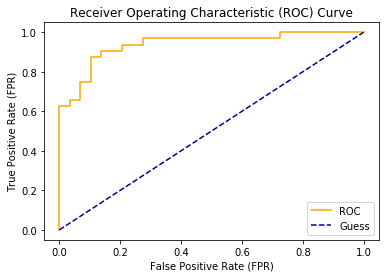

In [25]:
plot_roc_curve(fpr, tpr)

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9375

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [28]:
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,25,4
1,3,29


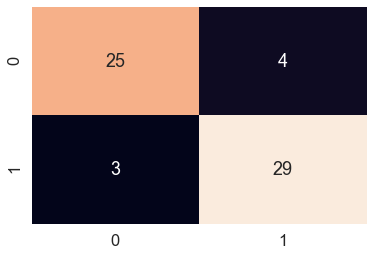

In [29]:
import seaborn as sns

# heatmap
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)

In [30]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

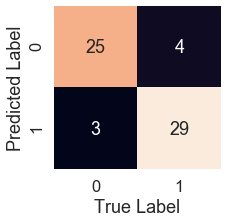

In [31]:
plot_conf_mat(confusion_matrix(y_test, y_preds))

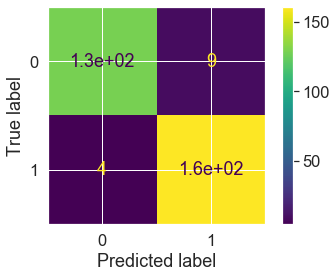

In [32]:
from sklearn.metrics import plot_confusion_matrix

np.random.seed(42)
plot_confusion_matrix(clf, X, y)

In [33]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Regression
- R^2 - Coefficient of Determination
    - Compares model's predictions to the mean of the targets (-ve infinity, 1]
- Mean Absolute Error (MAE)
    - Average of the absolute differences between predictions and actual values
- Mean Squared Error (MSE)

In [2]:
# reload boston df
boston = load_boston()
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['target'] = pd.Series(boston['target'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
np.random.seed(42)

X = df.drop('target', axis=1)
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# R^2 - Coefficient of Determination (default metric)
model.score(X_test, y_test)

0.8896648705127477

In [5]:
# R^2
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)
r2_score(y_test, y_preds)

0.8896648705127477

In [6]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.04936274509804

In [7]:
# Viewing the values
df = pd.DataFrame(data={
    'actual values': y_test,
    'predicted values': y_preds
})
df['errors'] = df['predicted values'] - df['actual values']
df['absolute errors'] = abs(df['errors'])
df.head()

,actual values,predicted values,errors,absolute errors
173,23.6,22.877,-0.723,0.723
274,32.4,30.517,-1.883,1.883
491,13.6,16.437,2.837,2.837
72,22.8,23.531,0.731,0.731
452,16.1,16.918,0.818,0.818


In [8]:
print(np.mean(df['absolute errors'])) # MAE

2.04936274509804


In [9]:
# Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

8.091292460784315

In [10]:
df['squared errors'] = np.square(df['errors'])
df.head()

,actual values,predicted values,errors,absolute errors,squared errors
173,23.6,22.877,-0.723,0.723,0.522729
274,32.4,30.517,-1.883,1.883,3.545689
491,13.6,16.437,2.837,2.837,8.048569
72,22.8,23.531,0.731,0.731,0.534361
452,16.1,16.918,0.818,0.818,0.669124


In [11]:
print(np.mean(df['squared errors']))

8.091292460784315
